In [142]:
!pip install pandas numpy matplotlib seaborn statsmodels


[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: pip install --upgrade pip


In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima.model import ARIMA
import seaborn as sns

In [144]:
# Prova a caricare il file con diverse configurazioni
# Sostituisci 'apple_stock.csv' con il percorso del file
df = pd.read_csv('Datasets/apple_stock.csv', sep=',', header=0)

# Stampa le prime righe per verificare che il file sia stato letto correttamente
print("Prime righe del dataset:")
print(df.head())

# Stampa le colonne disponibili
print("Colonne del dataset:", df.columns)

Prime righe del dataset:
         Date   Price    Open    High     Low     Vol. Change %
0  03/27/2024  173.31  170.30  173.58  170.14   59.11M    2.12%
1  03/26/2024  169.71  170.01  171.41  169.65   57.22M   -0.67%
2  03/25/2024  170.85  170.37  171.94  169.46   54.21M   -0.83%
3  03/22/2024  172.28  171.76  173.05  170.06   71.16M    0.53%
4  03/21/2024  171.37  177.05  177.49  170.84  106.18M   -4.09%
Colonne del dataset: Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')


In [145]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df.set_index('Date', inplace=True)

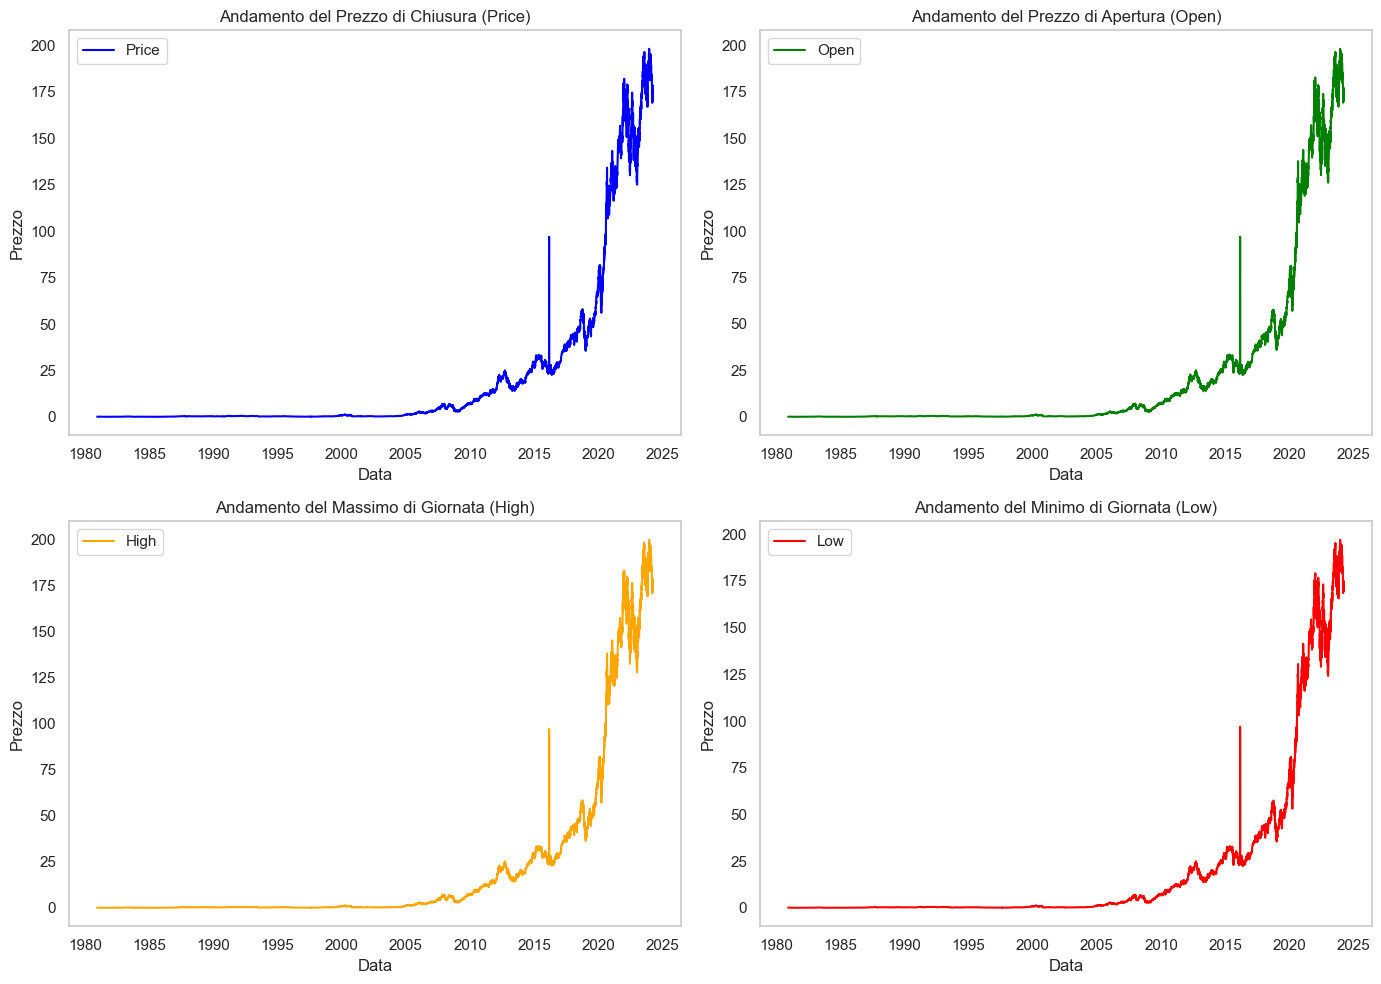

In [146]:
# Creazione dei grafici
plt.figure(figsize=(14, 10))

# Grafico dell'andamento del prezzo di chiusura (Price)
plt.subplot(2, 2, 1)
plt.plot(df.index, df['Price'], label='Price', color='blue')
plt.title('Andamento del Prezzo di Chiusura (Price)')
plt.xlabel('Data')
plt.ylabel('Prezzo')
plt.grid()
plt.legend()

# Grafico dell'andamento del prezzo di apertura (Open)
plt.subplot(2, 2, 2)
plt.plot(df.index, df['Open'], label='Open', color='green')
plt.title('Andamento del Prezzo di Apertura (Open)')
plt.xlabel('Data')
plt.ylabel('Prezzo')
plt.grid()
plt.legend()

# Grafico dell'andamento del massimo di giornata (High)
plt.subplot(2, 2, 3)
plt.plot(df.index, df['High'], label='High', color='orange')
plt.title('Andamento del Massimo di Giornata (High)')
plt.xlabel('Data')
plt.ylabel('Prezzo')
plt.grid()
plt.legend()

# Grafico dell'andamento del minimo di giornata (Low)
plt.subplot(2, 2, 4)
plt.plot(df.index, df['Low'], label='Low', color='red')
plt.title('Andamento del Minimo di Giornata (Low)')
plt.xlabel('Data')
plt.ylabel('Prezzo')
plt.grid()
plt.legend()

# Migliora il layout e mostra i grafici
plt.tight_layout()
plt.show()

In [147]:
# Filtro il dataset per il periodo 2015-2018
df_filtered = df[(df.index >= '2015-01-01') & (df.index <= '2018-12-31')]

# Trova la data con il massimo valore del prezzo di chiusura (Price) nel periodo filtrato
max_price_date = df_filtered['Price'].idxmax()
max_price_value = df_filtered['Price'].max()

print(f"Il picco massimo del prezzo tra il 2015 e il 2018 si verifica il {max_price_date} con un valore di {max_price_value}.")

Il picco massimo del prezzo tra il 2015 e il 2018 si verifica il 2016-02-27 00:00:00 con un valore di 96.95.


E' un picco insolito: 02/27/2016,96.95,96.95,96.95,96.95,,300.12%. E' un errore sicuro, infatti le altre fonti non riportano questo valore. I giornali non indicano nessun fatto rilevante collegato a questa data, e come ultima prova il 27 febbraio 2016 era sabato, quindi non era un giorno di negoziazione. 

Provvediamo a cancellare il picco...


In [148]:
# Cancellare la riga con la data '2016-02-27'
df = df.drop('2016-02-27', axis=0)
print("ok")

ok


Rifacciamo i grafici

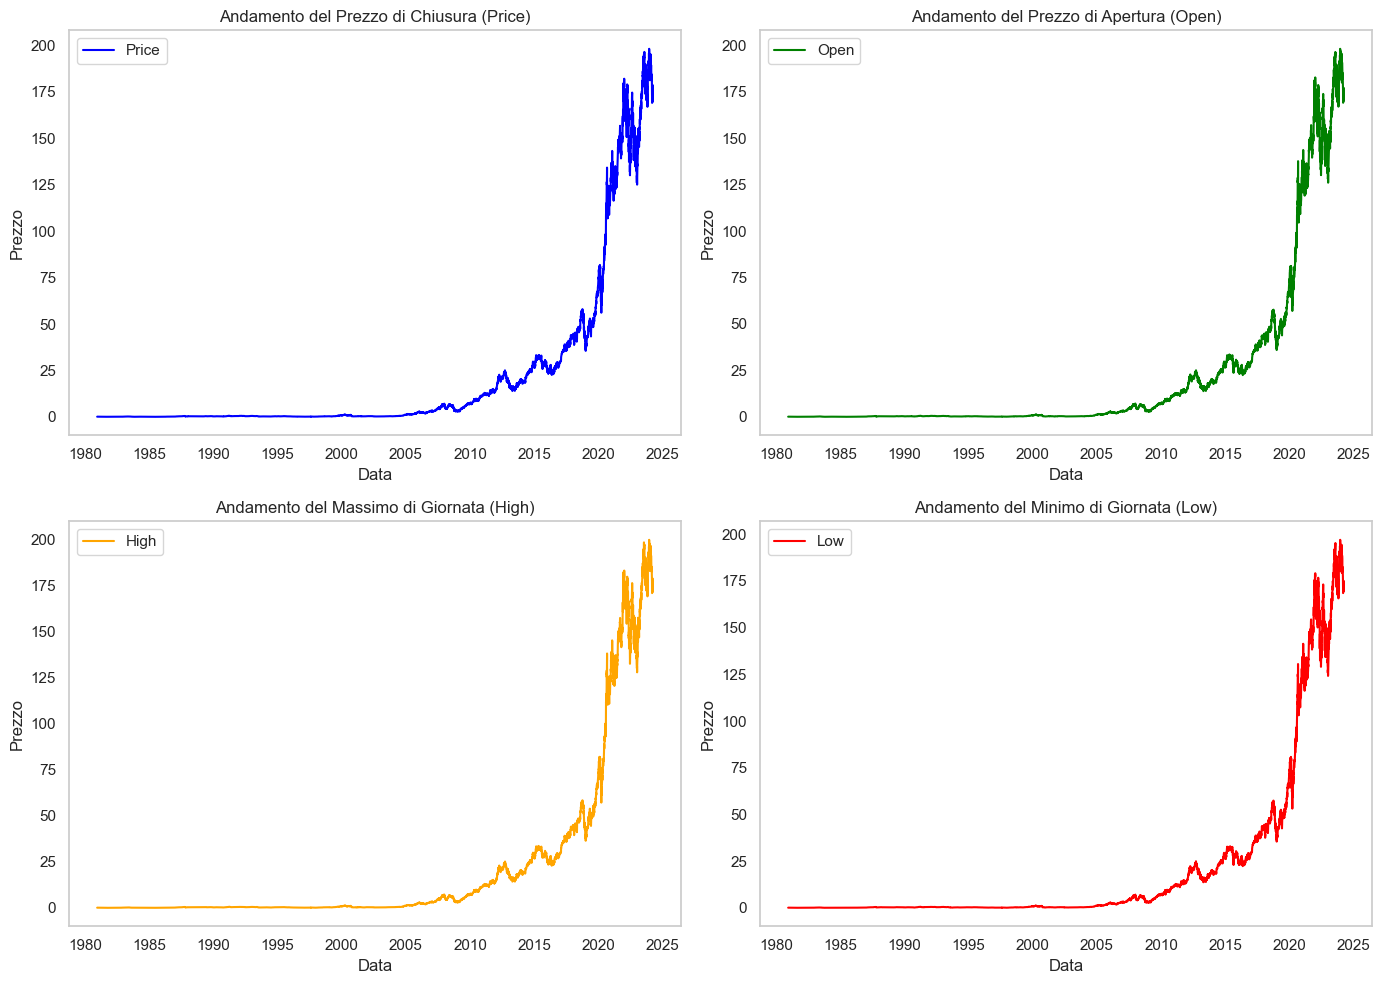

In [149]:
# Creazione dei grafici
plt.figure(figsize=(14, 10))

# Grafico dell'andamento del prezzo di chiusura (Price)
plt.subplot(2, 2, 1)
plt.plot(df.index, df['Price'], label='Price', color='blue')
plt.title('Andamento del Prezzo di Chiusura (Price)')
plt.xlabel('Data')
plt.ylabel('Prezzo')
plt.grid()
plt.legend()

# Grafico dell'andamento del prezzo di apertura (Open)
plt.subplot(2, 2, 2)
plt.plot(df.index, df['Open'], label='Open', color='green')
plt.title('Andamento del Prezzo di Apertura (Open)')
plt.xlabel('Data')
plt.ylabel('Prezzo')
plt.grid()
plt.legend()

# Grafico dell'andamento del massimo di giornata (High)
plt.subplot(2, 2, 3)
plt.plot(df.index, df['High'], label='High', color='orange')
plt.title('Andamento del Massimo di Giornata (High)')
plt.xlabel('Data')
plt.ylabel('Prezzo')
plt.grid()
plt.legend()

# Grafico dell'andamento del minimo di giornata (Low)
plt.subplot(2, 2, 4)
plt.plot(df.index, df['Low'], label='Low', color='red')
plt.title('Andamento del Minimo di Giornata (Low)')
plt.xlabel('Data')
plt.ylabel('Prezzo')
plt.grid()
plt.legend()

# Migliora il layout e mostra i grafici
plt.tight_layout()
plt.show()

Ora si che va bene 👍🏼

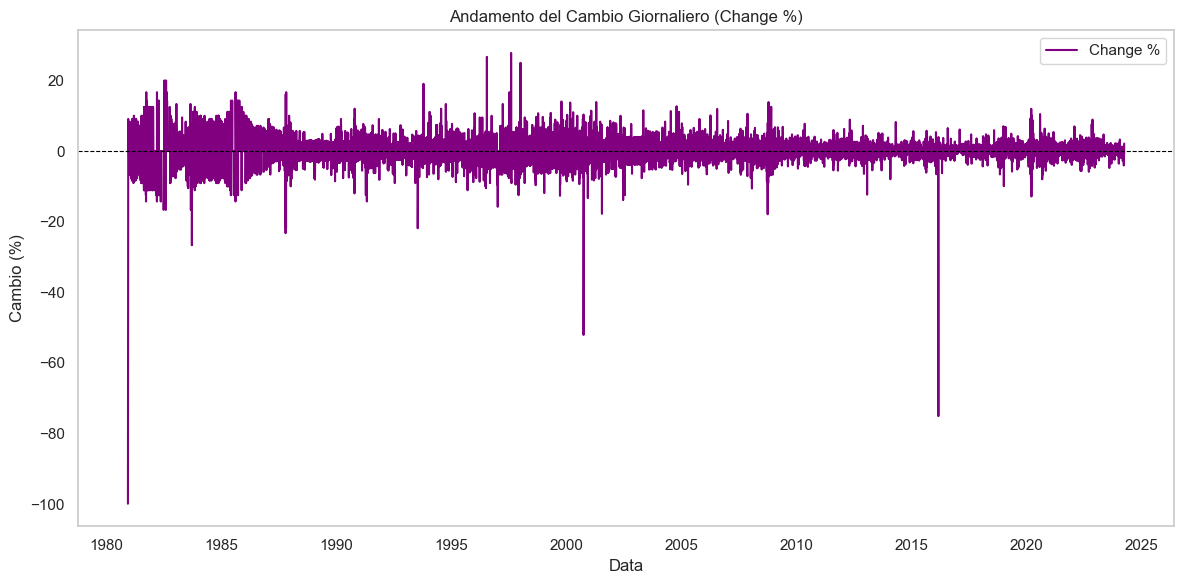

In [150]:
# Pulizia della colonna 'Change %': Rimuovi il simbolo '%' e converti in float
df['Change'] = df['Change %'].str.replace('%', '').astype(float)

# Creazione del grafico per l'andamento del cambio giornaliero
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Change'], label='Change %', color='purple')
plt.title('Andamento del Cambio Giornaliero (Change %)')
plt.xlabel('Data')
plt.ylabel('Cambio (%)')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Linea per zero
plt.grid()
plt.legend()

# Mostra il grafico
plt.tight_layout()
plt.show()

Noto cambi giornalieri più bassi del -30%. Se non fosse un errore, sarebbe un dato molto importante. Ma non penso siano reali. Un -40%/-50% sarebbe stata una tragedia. Vediamo quando si verificano questi picchi...

In [151]:
# Filtra i giorni con Change inferiore a -30%
low_change_days = df[df['Change'] < -30]

# Stampa a schermo le righe con Change < -30%
print("Giorni con un cambio inferiore a -30%:")
print(low_change_days)

Giorni con un cambio inferiore a -30%:
            Price   Open   High    Low     Vol. Change %  Change
Date                                                            
1980-12-12   0.13   0.13   0.13   0.13  469.03M  -99.88%  -99.88
2000-09-29   0.46   0.50   0.52   0.45    7.43B  -52.08%  -52.08
2016-02-29  24.17  24.21  24.56  24.16  140.87M  -75.07%  -75.07


1) Il -99.88% del 12 dicembre 1980 corrisponde a errore certo. Infatti quella data corrisponde all'IPO della Apple, e la variazione tra 0.13 e 0.13 è 0% casomai, non -99.88%. E poi non ho trovato corrispondenza sull'internet (Yahoo! Finance non lo riporta).

2) La variazione tra 0.50(Open) e 0.46(Close) non è -52.08%. Quindi è un errore certo.

3) La variazione tra 24.21(Open) e 24.17(Close) non è -75.07%. Quindi è un errore certo.


In [152]:
# Cancellare la riga con la data '1980-12-12'
df = df.drop('1980-12-12', axis=0)
print("ok")

ok


In [153]:
# Calcola la variazione percentuale (Price - Open) / Open * 100 per le date 2000-09-29 e 2016-02-29
dates_to_check = ['2000-09-29', '2016-02-29']

# Seleziona le righe per le date specificate
selected_rows = df.loc[dates_to_check, ['Open', 'Price']]

# Calcola la variazione percentuale di prezzo
df.loc[dates_to_check, 'Change'] = ((selected_rows['Price'] - selected_rows['Open']) / selected_rows['Open']) * 100

# Arrotonda la colonna 'Price Change %' a 2 decimali
df['Change'] = df['Change'].round(2)

# Stampa i risultati
print("Variazione percentuale di prezzo per le date selezionate:")
print(df.loc[dates_to_check, ['Open', 'Price', 'Change']])

Variazione percentuale di prezzo per le date selezionate:
             Open  Price  Change
Date                            
2000-09-29   0.50   0.46   -8.00
2016-02-29  24.21  24.17   -0.17


Ricalcoliamo i grafici per le variazioni giornaliere.

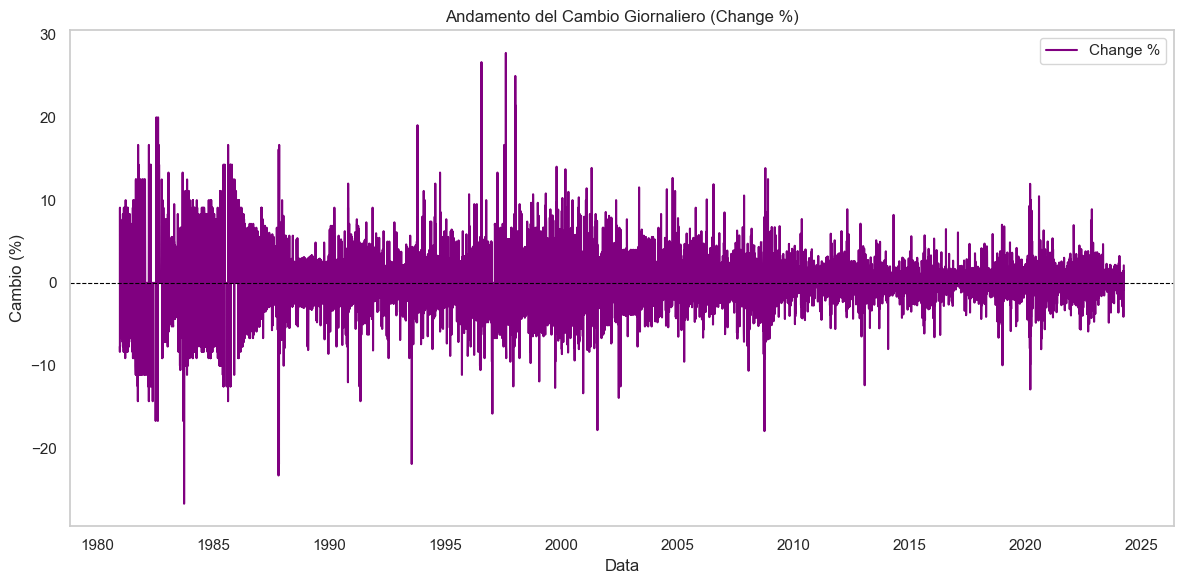

In [154]:
# Creazione del grafico per l'andamento del cambio giornaliero
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Change'], label='Change %', color='purple')
plt.title('Andamento del Cambio Giornaliero (Change %)')
plt.xlabel('Data')
plt.ylabel('Cambio (%)')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Linea per zero
plt.grid()
plt.legend()

# Mostra il grafico
plt.tight_layout()
plt.show()

### Andamento del volume giornaliero.

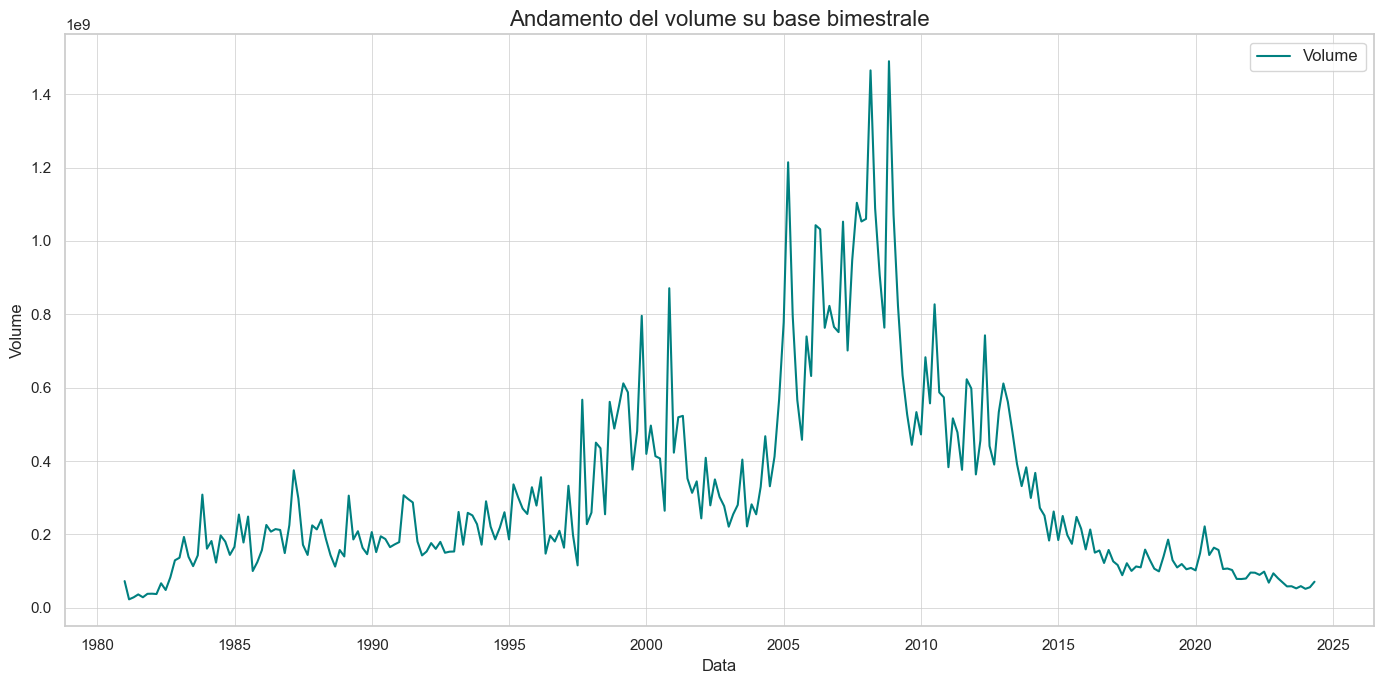

In [155]:
import pandas as pd
import matplotlib.pyplot as plt

# Assicurati che l'indice sia un DatetimeIndex
if not isinstance(df.index, pd.DatetimeIndex):
    df.index = pd.to_datetime(df.index)

# Funzione per convertire i volumi in float
def convert_volume(volume):
    if 'M' in volume:
        return float(volume.replace('M', '')) * 1_000_000
    elif 'B' in volume:
        return float(volume.replace('B', '')) * 1_000_000_000
    else:
        return float(volume)  # Se non contiene né M né B

# Applicare la funzione alla colonna "Vol."
df['Vol.'] = df['Vol.'].astype(str).apply(convert_volume)

# Resampling su base settimanale (media dei volumi settimanali)
weekly_volume_avg = df['Vol.'].resample('2M').mean()

# Creazione del grafico
plt.figure(figsize=(14, 7))
plt.plot(weekly_volume_avg.index, weekly_volume_avg, label='Volume', color='teal')
plt.title('Andamento del volume su base bimestrale', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Volume', fontsize=12)
plt.grid(True, which='both', linestyle='-', linewidth=0.5)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

### Decomposizione della serie temporale (utilizzando un periodo annuale)

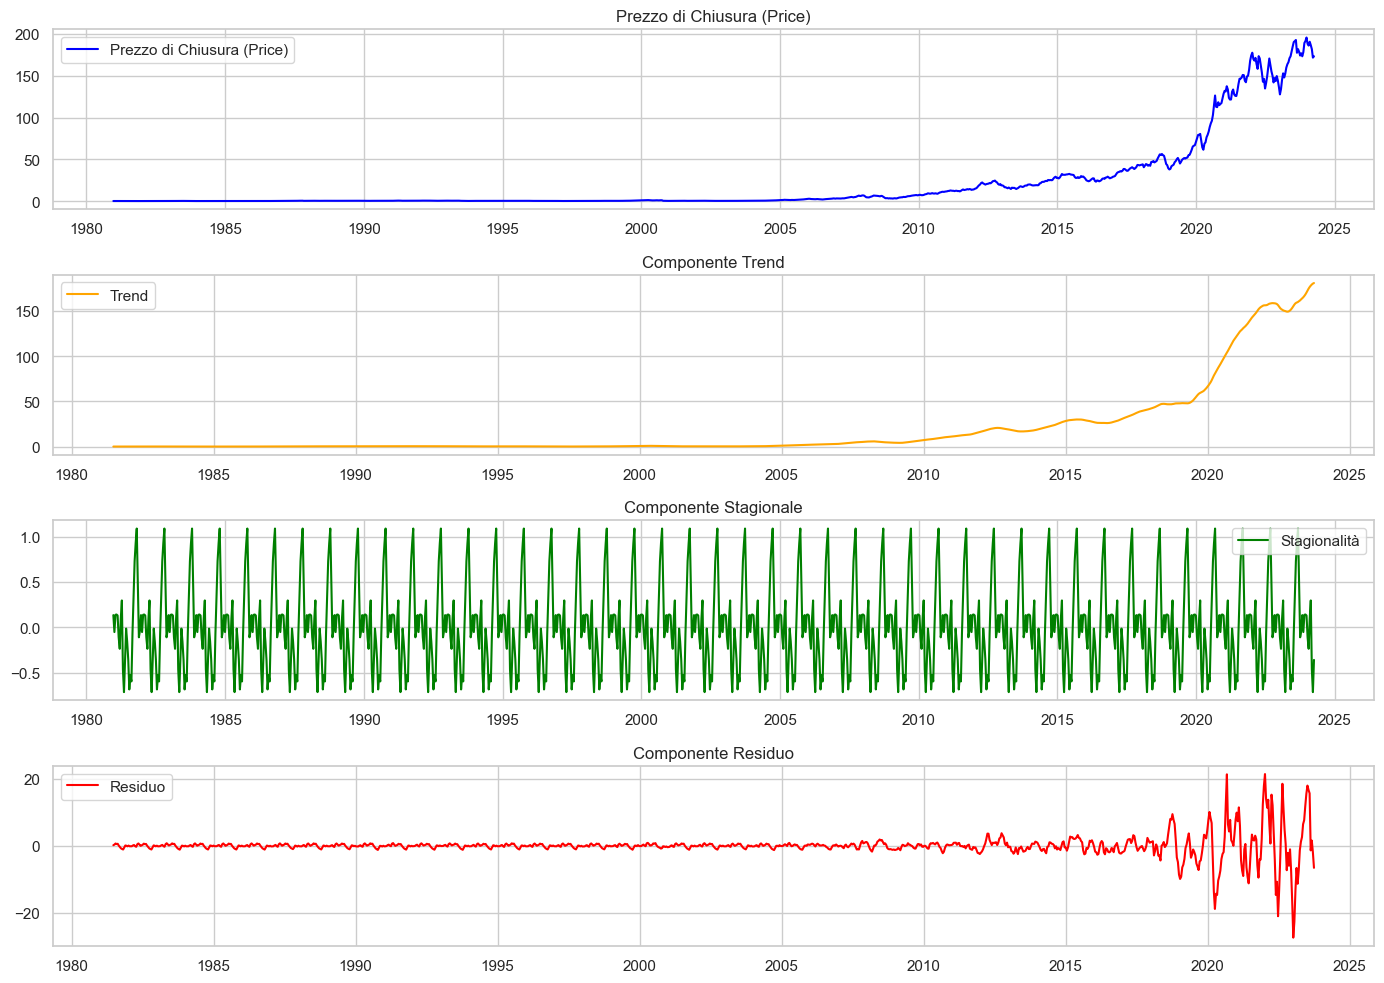

Componente stagionale (andamento stagionale annuale):
Date
1980-12-21    0.133753
1981-01-04   -0.052924
1981-01-18    0.137666
1981-02-01    0.140259
1981-02-15    0.129645
1981-03-01   -0.111050
1981-03-15   -0.237422
1981-03-29    0.095085
1981-04-12    0.295426
1981-04-26   -0.466227
1981-05-10   -0.714953
1981-05-24   -0.360120
1981-06-07   -0.014384
1981-06-21   -0.159204
1981-07-05   -0.355849
1981-07-19   -0.685489
1981-08-02   -0.528776
1981-08-16   -0.596953
1981-08-30   -0.064702
1981-09-13    0.347424
1981-09-27    0.728115
1981-10-11    0.929047
1981-10-25    1.087991
1981-11-08    0.471304
1981-11-22   -0.110789
1981-12-06   -0.036874
Freq: 2W-SUN, Name: seasonal, dtype: float64


In [156]:
# Seleziona solo la colonna 'Price' per l'analisi
price_data = df['Price']

# Aggregazione ogni 2 settimane calcolando la media
price_biweekly = price_data.resample('2W').mean()

# Decomposizione della serie temporale (utilizzando un periodo annuale: 26 periodi per dati aggregati ogni 2 settimane)
decomposition = seasonal_decompose(price_biweekly, model='additive', period=26)

price_data = price_biweekly

# Visualizzazione della decomposizione
plt.figure(figsize=(14, 10))

plt.subplot(4, 1, 1)
plt.plot(price_biweekly, label='Prezzo di Chiusura (Price)', color='blue')
plt.legend(loc='best')
plt.title('Prezzo di Chiusura (Price)')

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.legend(loc='best')
plt.title('Componente Trend')

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Stagionalità', color='green')
plt.legend(loc='best')
plt.title('Componente Stagionale')

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residuo', color='red')
plt.legend(loc='best')
plt.title('Componente Residuo')

plt.tight_layout()
plt.show()

# Analisi visiva della componente stagionale
print("Componente stagionale (andamento stagionale annuale):")
print(decomposition.seasonal.head(26))  # Stampa i primi 26 periodi, corrispondenti a un anno

### Forecasting con ARIMA

In [157]:
from statsmodels.tsa.stattools import adfuller
# Seleziona solo la colonna 'Price' (Prezzo di Chiusura)


# Applicazione del test ADF
adf_result = adfuller(price_data)

# Stampa i risultati
print("Risultati del test ADF:")
print(f"Statistic Value: {adf_result[0]}")
print(f"P-value: {adf_result[1]}")
print(f"Number of Lags Used: {adf_result[2]}")
print(f"Number of Observations Used: {adf_result[3]}")
print(f"Critical Values: {adf_result[4]}")

Risultati del test ADF:
Statistic Value: 3.0449103198110095
P-value: 1.0
Number of Lags Used: 23
Number of Observations Used: 1106
Critical Values: {'1%': np.float64(-3.4362763491428243), '5%': np.float64(-2.8641567820457636), '10%': np.float64(-2.568163254776674)}


Poiché la serie non è stazionaria, è necessario rendere la serie stazionaria per applicare correttamente un modello ARIMA.

Differenziare la Serie: Possiamo provare a differenziare la serie (ad esempio, con price_data.diff()), e poi applicare di nuovo il test ADF per verificare se la serie è diventata stazionaria.

In [168]:
price_data_diff = price_data.diff().dropna()
adf_result_diff = adfuller(price_data_diff)
print(f"Statistic Value (Differenziata): {adf_result_diff[0]}")
print(f"P-value (Differenziata): {adf_result_diff[1]}")

Statistic Value (Differenziata): -6.4483425790061535
P-value (Differenziata): 1.5456696190351868e-08


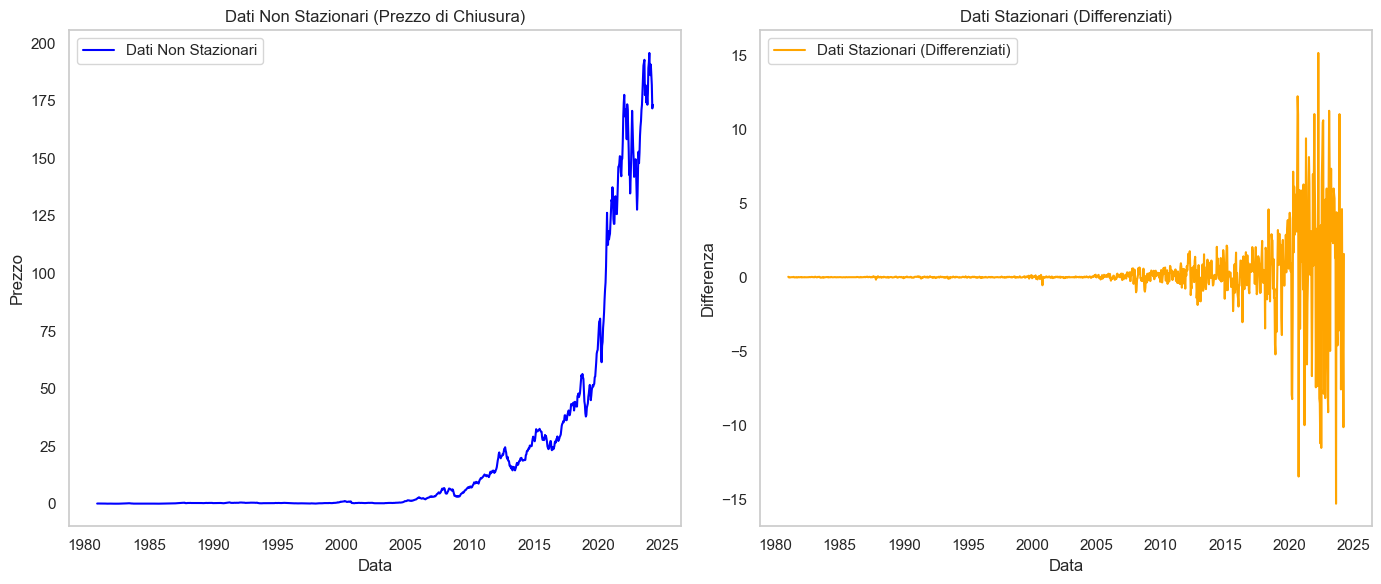

In [161]:
import matplotlib.pyplot as plt

# Grafico dei dati di partenza non stazionari e di quelli stazionari dopo la differenziazione
plt.figure(figsize=(14, 6))

# Grafico dei dati di partenza (non stazionari)
plt.subplot(1, 2, 1)
plt.plot(price_data, label='Dati Non Stazionari', color='blue')
plt.title('Dati Non Stazionari (Prezzo di Chiusura)')
plt.xlabel('Data')
plt.ylabel('Prezzo')
plt.legend()
plt.grid()

# Grafico dei dati dopo la differenziazione (stazionari)
plt.subplot(1, 2, 2)
plt.plot(price_data_diff, label='Dati Stazionari (Differenziati)', color='orange')
plt.title('Dati Stazionari (Differenziati)')
plt.xlabel('Data')
plt.ylabel('Differenza')
plt.legend()
plt.grid()

# Mostra i grafici affiancati
plt.tight_layout()
plt.show()

### ACF e PACF

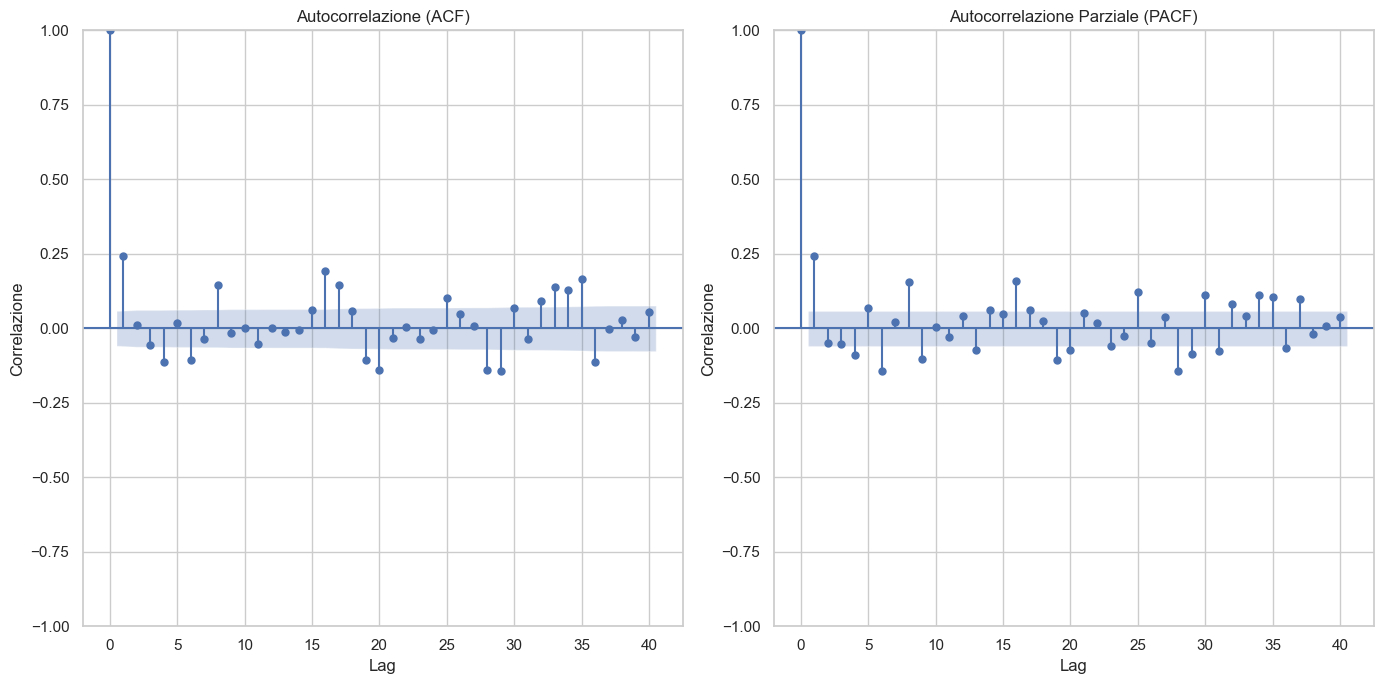

In [162]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Supponiamo che price_data_diff sia la serie temporale differenziata
# Se non hai già differenziato la serie, puoi farlo così:
# price_data_diff = price_data.diff().dropna()

# Creazione dei grafici per ACF e PACF
plt.figure(figsize=(14, 7))

# Plot ACF
plt.subplot(1, 2, 1)
plot_acf(price_data_diff, lags=40, ax=plt.gca(), alpha=0.05)
plt.title('Autocorrelazione (ACF)')
plt.xlabel('Lag')
plt.ylabel('Correlazione')

# Plot PACF
plt.subplot(1, 2, 2)
plot_pacf(price_data_diff, lags=40, ax=plt.gca(), alpha=0.05, method='ywm')
plt.title('Autocorrelazione Parziale (PACF)')
plt.xlabel('Lag')
plt.ylabel('Correlazione')

# Mostra i grafici
plt.tight_layout()
plt.show()

In [169]:
from statsmodels.tsa.arima.model import ARIMA

# Divisione dei dati in training e test
train_data = price_data[:'2019-12-31']  # Dati di training fino al 2019

# Creazione e addestramento del modello ARIMA
model_arima = ARIMA(train_data, order=(0, 2, 1))  # Sostituisci con i parametri scelti
model_arima_fit = model_arima.fit()

# Specifiche principali del modello
print("Specifiche del modello ARIMA:")
print(f"Ordine del modello (p, d, q): {model_arima_fit.model_orders}")
print(f"AIC (Akaike Information Criterion): {model_arima_fit.aic}")
print(f"BIC (Bayesian Information Criterion): {model_arima_fit.bic}")
print(f"Log-Likelihood: {model_arima_fit.llf}")
print(f"Coefficiente ARIMA: {model_arima_fit.params}")

# Residui
residui = model_arima_fit.resid
print("Residui del modello:")
print(residui.head())

# Riassunto completo del modello
print("Riassunto del modello:")
print(model_arima_fit.summary())

Specifiche del modello ARIMA:
Ordine del modello (p, d, q): {'trend': 0, 'exog': 0, 'ar': 0, 'ma': 1, 'seasonal_ar': 0, 'seasonal_ma': 0, 'reduced_ar': 0, 'reduced_ma': 1, 'exog_variance': 0, 'measurement_variance': 0, 'variance': 1}
AIC (Akaike Information Criterion): 1997.2427090954106
BIC (Bayesian Information Criterion): 2007.0919338875078
Log-Likelihood: -996.6213545477053
Coefficiente ARIMA: ma.L1    -0.862152
sigma2    0.415070
dtype: float64
Residui del modello:
Date
1980-12-21    0.120000
1981-01-04   -0.030000
1981-01-18   -0.039000
1981-02-01   -0.009287
1981-02-15   -0.027080
Freq: 2W-SUN, dtype: float64
Riassunto del modello:
                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1019
Model:                 ARIMA(0, 2, 1)   Log Likelihood                -996.621
Date:                Mon, 03 Feb 2025   AIC                           1997.243
Time:                        12:06:42

MSE (Mean Squared Error): 1012.4980
RMSE (Root Mean Squared Error): 31.8198


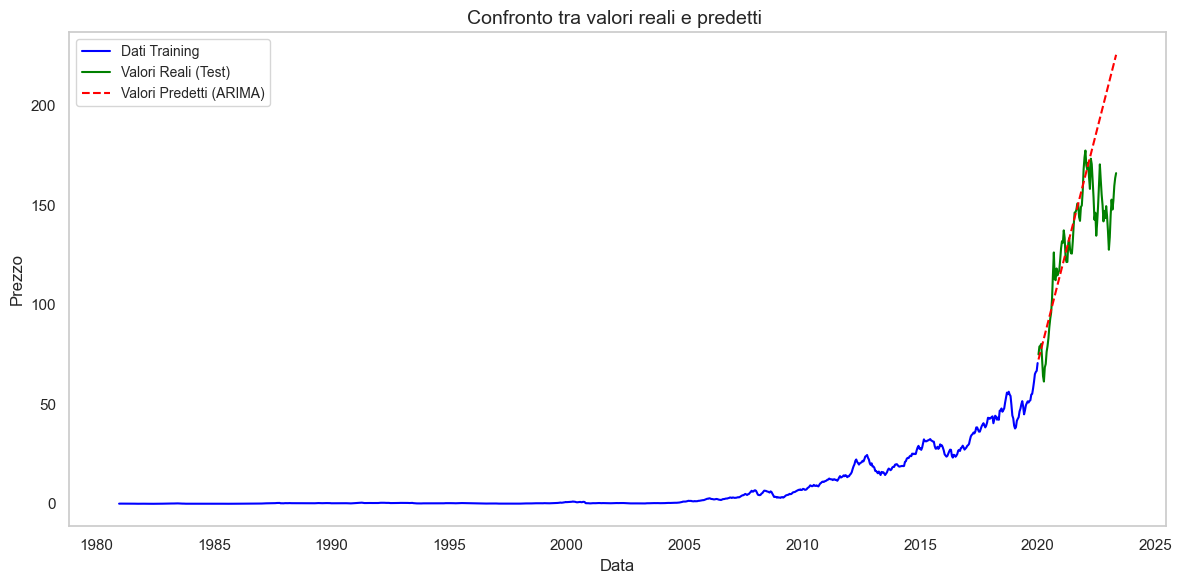

Confronto tra valori reali e predetti:
      Data  Valori Reali  Valori Predetti
2020-01-12     75.120000        72.543843
2020-01-26     79.075556        74.324352
2020-02-09     79.464000        76.104861
2020-02-23     80.394444        77.885371
2020-03-08     72.466000        79.665880
2020-03-22     64.223000        81.446389
2020-04-05     61.482000        83.226898
2020-04-19     68.616667        85.007408
2020-05-03     70.293000        86.787917
2020-05-17     76.414000        88.568426


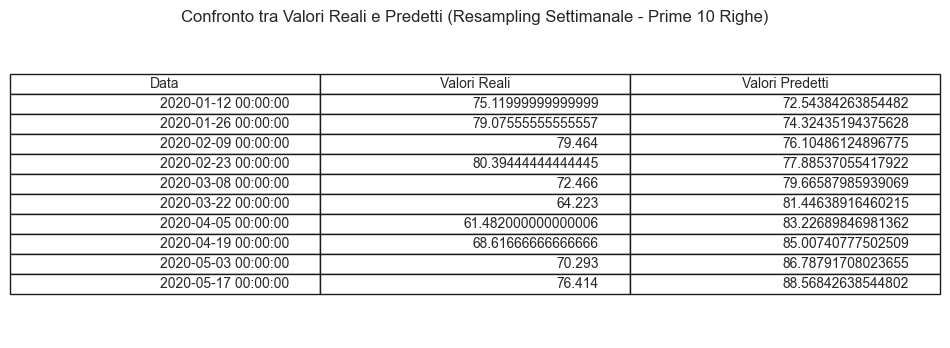

In [172]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# Supponiamo che 'price_data' sia la serie temporale completa
price_data = df['Price']

# Resampling su base settimanale (media dei prezzi settimanali)
weekly_data = price_data.resample('2W').mean()

# Divisione dei dati in training e test
train_data = weekly_data[:'2019-12-31']  # Training fino al 2020
test_data = weekly_data['2020-01-01':'2023-05-01']  # Test dal 2021 al 2024

# Creazione del modello ARIMA
model_arima = ARIMA(train_data, order=(0, 2, 1))
model_arima_fit = model_arima.fit()

# Previsione sui dati di test
forecast_steps = len(test_data)
forecast_values = model_arima_fit.forecast(steps=forecast_steps)


# Calcolo di MSE e RMSE
mse = mean_squared_error(test_data, forecast_values)
rmse = sqrt(mse)

print(f"MSE (Mean Squared Error): {mse:.4f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.4f}")

# Creazione di un DataFrame per il confronto
comparison_df = pd.DataFrame({
    'Data': test_data.index,
    'Valori Reali': test_data.values,
    'Valori Predetti': forecast_values
})

# Visualizzazione del grafico
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='Dati Training', color='blue')
plt.plot(test_data.index, test_data, label='Valori Reali (Test)', color='green')
plt.plot(test_data.index, forecast_values, label='Valori Predetti (ARIMA)', color='red', linestyle='--')
plt.title('Confronto tra valori reali e predetti ', fontsize=14)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Prezzo', fontsize=12)
plt.legend(fontsize=10)
plt.grid()
plt.tight_layout()
plt.show()

# Mostra i risultati in tabella (prime righe)
print("Confronto tra valori reali e predetti:")
print(comparison_df.head(10).to_string(index=False))

# Tabella come immagine
fig, ax = plt.subplots(figsize=(10, 4))
ax.axis('off')
table = ax.table(cellText=comparison_df.head(10).values, colLabels=comparison_df.columns, loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)
plt.title("Confronto tra Valori Reali e Predetti (Resampling Settimanale - Prime 10 Righe)", fontsize=12)
plt.show()

In [174]:

# Supponiamo che il dataframe 'df' abbia l'indice temporale impostato come datetime
# Filtra i dati degli ultimi 10 anni
last_10_years = price_data[price_data.index >= '2013-01-01']

# Calcola la media dei prezzi degli ultimi 10 anni
prezzo_medio_ultimi_10_anni = last_10_years.mean()
print(f"Prezzo medio delle azioni negli ultimi 10 anni: {prezzo_medio_ultimi_10_anni}")

Prezzo medio delle azioni negli ultimi 10 anni: 74.67679872656527


MSE (Mean Squared Error): 89.2233
RMSE (Root Mean Squared Error): 9.4458


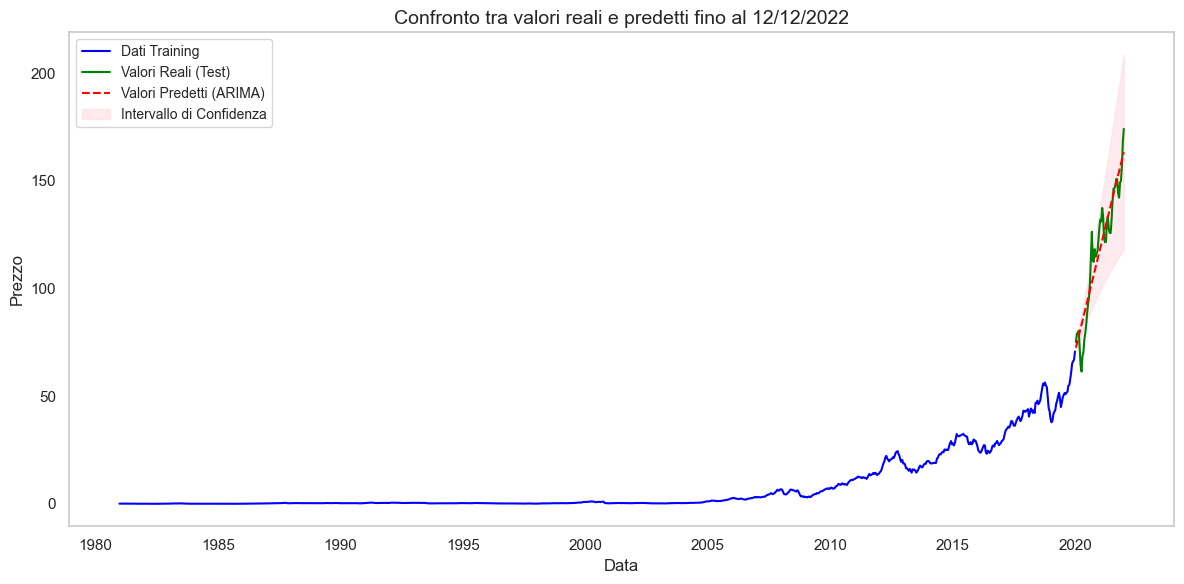

Confronto tra valori reali e predetti con intervallo di confidenza:
      Data  Valori Reali  Valori Predetti  Conf_Lower  Conf_Upper
2020-01-12     75.120000        72.543843   71.281118   73.806567
2020-01-26     79.075556        74.324352   72.411545   76.237159
2020-02-09     79.464000        76.104861   73.604126   78.605596
2020-02-23     80.394444        77.885371   74.812978   80.957763
2020-03-08     72.466000        79.665880   76.022092   83.309668
2020-03-22     64.223000        81.446389   77.224179   85.668599
2020-04-05     61.482000        83.226898   78.415475   88.038322
2020-04-19     68.616667        85.007408   79.593907   90.420909
2020-05-03     70.293000        86.787917   80.758302   92.817532
2020-05-17     76.414000        88.568426   81.908008   95.228845


In [175]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# Supponiamo che 'price_data' sia la serie temporale completa
price_data = df['Price']

# Resampling su base settimanale (media dei prezzi settimanali)
weekly_data = price_data.resample('2W').mean()

# Divisione dei dati in training e test
train_data = weekly_data[:'2019-12-31']  # Training fino al 2020
test_data = weekly_data['2020-01-01':'2021-12-31']  # Test dal 2021 al 2024

# Creazione del modello ARIMA
model_arima = ARIMA(train_data, order=(0, 2, 1))
model_arima_fit = model_arima.fit()

# Previsione sui dati di test con intervalli di confidenza
forecast_steps = len(test_data)
forecast = model_arima_fit.get_forecast(steps=forecast_steps)
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

# Calcolo di MSE e RMSE
mse = mean_squared_error(test_data, forecast_values)
rmse = sqrt(mse)

print(f"MSE (Mean Squared Error): {mse:.4f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.4f}")

# Creazione di un DataFrame per il confronto
comparison_df = pd.DataFrame({
    'Data': test_data.index,
    'Valori Reali': test_data.values,
    'Valori Predetti': forecast_values,
    'Conf_Lower': conf_int.iloc[:, 0],
    'Conf_Upper': conf_int.iloc[:, 1]
})

# Visualizzazione del grafico con intervalli di confidenza
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='Dati Training', color='blue')
plt.plot(test_data.index, test_data, label='Valori Reali (Test)', color='green')
plt.plot(test_data.index, forecast_values, label='Valori Predetti (ARIMA)', color='red', linestyle='--')
plt.fill_between(test_data.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3, label='Intervallo di Confidenza')
plt.title('Confronto tra valori reali e predetti fino al 12/12/2022', fontsize=14)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Prezzo', fontsize=12)
plt.legend(fontsize=10)
plt.grid()
plt.tight_layout()
plt.show()

# Mostra i risultati in tabella (prime righe)
print("Confronto tra valori reali e predetti con intervallo di confidenza:")
print(comparison_df.head(10).to_string(index=False))

# Previsione sul volume


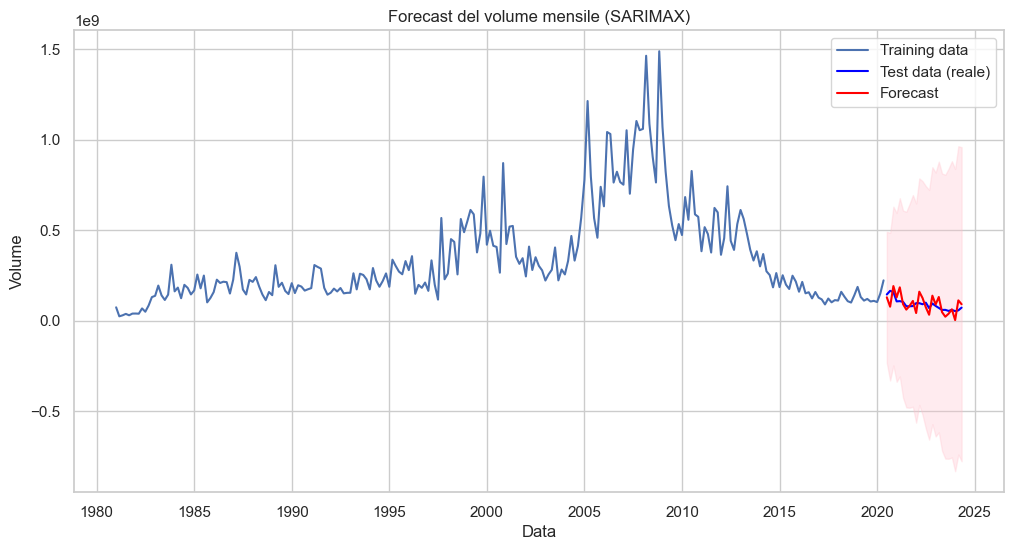

MSE: 1673378357020570.2
RMSE: 40906947.5397587


In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import numpy as np

# Disabilita alcuni warning per una maggiore chiarezza nell'output
warnings.filterwarnings('ignore')

# ----------------------------
# 1. Caricamento dei dati
# ----------------------------
# Se il dataframe non è già caricato, ad esempio puoi caricarlo da un CSV:
# df = pd.read_csv('tuo_file.csv', parse_dates=['Date'], index_col='Date')
#
# Supponiamo che il dataframe 'df' sia già presente e che l'indice sia di tipo datetime.

# ----------------------------
# 2. Conversione della colonna Vol.
# ----------------------------
def convert_volume(vol):
    """
    Converte una stringa di volume che contiene 'M' (milioni) o 'B' (miliardi)
    nel valore numerico corrispondente.
    """
    if isinstance(vol, str):
        vol = vol.strip()  # Rimuove eventuali spazi bianchi
        if 'M' in vol:
            return float(vol.replace('M', '')) * 1e6
        elif 'B' in vol:
            return float(vol.replace('B', '')) * 1e9
        else:
            return float(vol)
    return vol

# Applica la funzione a tutta la colonna 'Vol.'
df['Vol.'] = df['Vol.'].apply(convert_volume)

# ----------------------------
# 3. Resampling mensile dei dati
# ----------------------------
# In questo esempio si sommano i volumi per ogni mese
df_monthly = df['Vol.'].resample('2M').mean()

# ----------------------------
# 4. Divisione in training set e test set
# ----------------------------
# Utilizziamo gli ultimi 12 mesi del dataset come test set
n_test = 24
train = df_monthly.iloc[:-n_test]
test  = df_monthly.iloc[-n_test:]

# ----------------------------
# 5. Forecasting con SARIMAX sui dati di training
# ----------------------------
# Impostiamo il modello SARIMAX.
# Qui usiamo come esempio order=(1,1,1) e seasonal_order=(1,1,1,12)
model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12))
model_fit = model.fit(disp=False)

# Effettuiamo il forecast per il periodo di test (12 mesi)
steps = len(test)
forecast_object = model_fit.get_forecast(steps=steps)

# L'indice del forecast sarà quello del test set
forecast_index = test.index
forecast_series = pd.Series(forecast_object.predicted_mean, index=forecast_index)

# Estraiamo gli intervalli di confidenza per il forecast
conf_int = forecast_object.conf_int()

# ----------------------------
# 6. Visualizzazione dei risultati
# ----------------------------
plt.figure(figsize=(12,6))
plt.plot(train, label='Training data')
plt.plot(test, label='Test data (reale)', color='blue')
plt.plot(forecast_series, label='Forecast', color='red')
plt.fill_between(forecast_index,
                 conf_int.iloc[:, 0],
                 conf_int.iloc[:, 1],
                 color='pink', alpha=0.3)
plt.title('Forecast del volume mensile (SARIMAX)')
plt.xlabel('Data')
plt.ylabel('Volume')
plt.legend()
plt.show()

# ----------------------------
# 7. Calcolo degli errori: MSE e RMSE
# ----------------------------
mse = mean_squared_error(test, forecast_series)
rmse = np.sqrt(mse)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")